In [ ]:
import pandas as pd          
import numpy as np          # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
from datetime import datetime    # To access datetime
from pandas import Series        # To work on series
import matplotlib
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")
from math import sqrt
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
df = pd.read_excel('Merged_pollution_dataset.xlsx')
df_bbsr = df[(df['City/Town/Village/Area'] == 'Bhubaneswar') | (df['City/Town/Village/Area'] == 'Bhubaneshwar')]

df_bbsr.dtypes

df_bbsr['RSPM/PM10'] = pd.to_numeric(df_bbsr['RSPM/PM10'], errors='coerce')
df_bbsr['SO2'] = pd.to_numeric(df_bbsr['SO2'], errors='coerce')
df_bbsr['NO2'] = pd.to_numeric(df_bbsr['NO2'], errors='coerce')
df_bbsr['SPM'] = pd.to_numeric(df_bbsr['SPM'], errors='coerce')

pol_obs = 'SPM'

In [ ]:
df_bbsr['Location of Monitoring Station'].replace('SPCB Building, Bhubaneshwar', 'OSPCB Bldg',inplace=True)
df_bbsr['Location of Monitoring Station'].replace('Capital Police Station, Bhubaneshwar', 'Capital Police Stn.',inplace=True)
df_bbsr['Location of Monitoring Station'].replace('IRC Vilage, Bhubaneshwar', 'IRC',inplace=True)
df_bbsr['Location of Monitoring Station'].replace('Chandrasekharpur. Bhubneswar', 'Chandrasekharpur',inplace=True)
df_bbsr['Location of Monitoring Station'].replace('Water works, Palasuni, Bhubneswar', 'Palasuni',inplace=True)
df_bbsr['Location of Monitoring Station'].replace('Patrapada, Bhubneswar', 'Patrapada',inplace=True)

In [ ]:
df_bbsr_cps = df_bbsr[(df_bbsr['Location of Monitoring Station'] == 'Capital Police Stn.')]

df_bbsr_cps['Sampling Date'] = pd.to_datetime(df_bbsr_cps['Sampling Date'], format='%Y-%m-%d %H:%M')

df_bbsr_cps.dtypes

Stn Code                                 float64
Sampling Date                     datetime64[ns]
State                                     object
City/Town/Village/Area                    object
Location of Monitoring Station            object
Agency                                    object
Type of Location                          object
SO2                                      float64
NO2                                      float64
RSPM/PM10                                float64
SPM                                      float64
dtype: object

In [ ]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,8

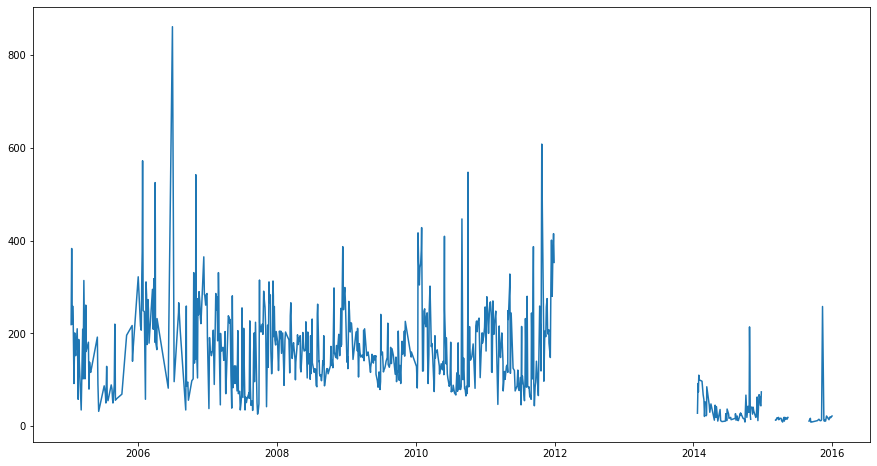

In [ ]:
df_bbsr_cps = df_bbsr_cps.set_index(df_bbsr_cps['Sampling Date'])
df_bbsr_cps = df_bbsr_cps.sort_index()
plt.plot(df_bbsr_cps[pol_obs])

In [ ]:
df_bbsr_cps = df_bbsr_cps.drop(['Stn Code','State','Location of Monitoring Station',
                                'Agency','Type of Location','City/Town/Village/Area','Sampling Date'],axis = 1)

cols = df_bbsr_cps.columns

for field in cols:
   print(field, df_bbsr_cps[field].isna().sum())

date_series = df_bbsr_cps.index

SO2 389
NO2 3
RSPM/PM10 0
SPM 222


In [ ]:
print(date_series)

DatetimeIndex(['2005-01-14', '2005-01-17', '2005-01-20', '2005-01-22',
               '2005-01-25', '2005-01-29', '2005-02-02', '2005-02-03',
               '2005-02-07', '2005-02-15',
               ...
               '2015-11-18', '2015-11-20', '2015-11-23', '2015-11-27',
               '2015-12-02', '2015-12-15', '2015-12-18', '2015-12-21',
               '2015-12-23', '2015-12-31'],
              dtype='datetime64[ns]', name='Sampling Date', length=939, freq=None)


In [ ]:
from fancyimpute import IterativeImputer
mice_imputer = IterativeImputer()
df_bbsr_cps_imputed =  mice_imputer.fit_transform(df_bbsr_cps)

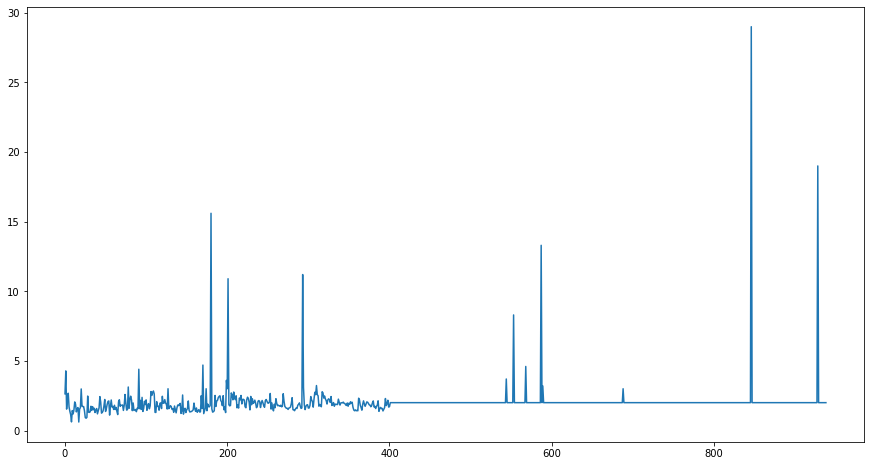

In [ ]:
plt.plot(df_bbsr_cps_imputed[:, 0])

In [ ]:
df_bbsr_cps_after_impute = pd.DataFrame(data = df_bbsr_cps_imputed, columns = df_bbsr_cps.columns)
df_bbsr_cps_after_impute.head()

,SO2,NO2,RSPM/PM10,SPM
0,2.635859,14.0,140.0,219.0
1,4.280287,20.0,270.0,383.0
2,1.537766,25.0,95.0,220.0
3,2.308368,21.0,141.0,259.0
4,2.676068,36.0,152.0,226.0


In [ ]:
df_bbsr_cps_after_impute['Date'] = date_series
df_bbsr_cps_after_impute.head()

,SO2,NO2,RSPM/PM10,SPM,Date
0,2.635859,14.0,140.0,219.0,2005-01-14
1,4.280287,20.0,270.0,383.0,2005-01-17
2,1.537766,25.0,95.0,220.0,2005-01-20
3,2.308368,21.0,141.0,259.0,2005-01-22
4,2.676068,36.0,152.0,226.0,2005-01-25


In [ ]:
df_bbsr_cps_after_impute = df_bbsr_cps_after_impute.set_index(df_bbsr_cps_after_impute['Date'], drop = True)
df_bbsr_cps_after_impute = df_bbsr_cps_after_impute.sort_index()
df_bbsr_cps_after_impute.head()

,SO2,NO2,RSPM/PM10,SPM,Date
Date,,,,,
2005-01-14,2.635859,14.0,140.0,219.0,2005-01-14
2005-01-17,4.280287,20.0,270.0,383.0,2005-01-17
2005-01-20,1.537766,25.0,95.0,220.0,2005-01-20
2005-01-22,2.308368,21.0,141.0,259.0,2005-01-22
2005-01-25,2.676068,36.0,152.0,226.0,2005-01-25


In [ ]:
df_bbsr_cps_after_impute = df_bbsr_cps_after_impute.drop(['Date'], axis = 1)
df_bbsr_cps_after_impute.head()

,SO2,NO2,RSPM/PM10,SPM
Date,,,,
2005-01-14,2.635859,14.0,140.0,219.0
2005-01-17,4.280287,20.0,270.0,383.0
2005-01-20,1.537766,25.0,95.0,220.0
2005-01-22,2.308368,21.0,141.0,259.0
2005-01-25,2.676068,36.0,152.0,226.0


In [ ]:
df_index_list = df_bbsr_cps_after_impute.index.values
years = pd.DatetimeIndex(df_index_list)
list_year = years.year
list_month = years.month
list_day = years.day
list_dayOfWeek = years.dayofweek
df_bbsr_cps_after_impute['year'] = list_year 
df_bbsr_cps_after_impute['month'] = list_month 
df_bbsr_cps_after_impute['day'] = list_day
df_bbsr_cps_after_impute['day_of_week'] = list_dayOfWeek

#Determining Weekend
def weekend(row):
   if (row == 5) or (row == 6):
       return 1
   else:
       return 0

df_bbsr_cps_after_impute['weekend'] = df_bbsr_cps_after_impute['day_of_week'].apply(weekend)
df_bbsr_cps_after_impute.head()

,SO2,NO2,RSPM/PM10,SPM,year,month,day,day_of_week,weekend
Date,,,,,,,,,
2005-01-14,2.635859,14.0,140.0,219.0,2005,1,14,4,0
2005-01-17,4.280287,20.0,270.0,383.0,2005,1,17,0,0
2005-01-20,1.537766,25.0,95.0,220.0,2005,1,20,3,0
2005-01-22,2.308368,21.0,141.0,259.0,2005,1,22,5,1
2005-01-25,2.676068,36.0,152.0,226.0,2005,1,25,1,0


In [ ]:
mean_ospcb = df_bbsr_cps_after_impute[pol_obs].min()
std_dev_ospcb = df_bbsr_cps_after_impute[pol_obs].max() - df_bbsr_cps_after_impute[pol_obs].min()

cols = df_bbsr_cps_after_impute.columns
for field in cols:    
   df_bbsr_cps_after_impute[field][df_bbsr_cps_after_impute[field] > (df_bbsr_cps_after_impute[field].mean() + 2.5*df_bbsr_cps_after_impute[field].std())] = np.nan


In [ ]:
for field in cols:
   print(field, df_bbsr_cps_after_impute[field].isna().sum())

SO2 7
NO2 25
RSPM/PM10 19
SPM 16
year 0
month 0
day 0
day_of_week 0
weekend 0


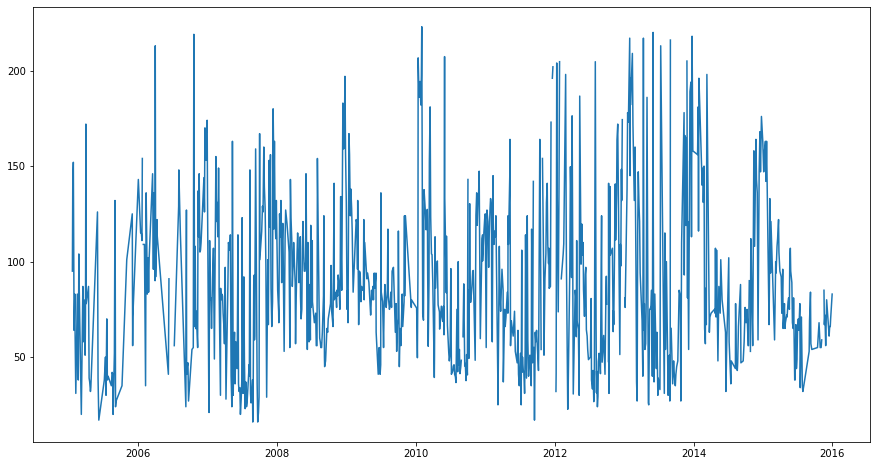

In [ ]:
plt.plot(df_bbsr_cps_after_impute['RSPM/PM10'])

In [ ]:
print(cols)

Index(['SO2', 'NO2', 'RSPM/PM10', 'SPM', 'year', 'month', 'day', 'day_of_week',
       'weekend'],
      dtype='object')


In [ ]:
for field in cols:
  df_bbsr_cps_after_impute[field] = df_bbsr_cps_after_impute[field].interpolate(method = 'spline', order = 3)

In [ ]:
for field in cols:
   print(field, df_bbsr_cps_after_impute[field].isna().sum())

SO2 0
NO2 0
RSPM/PM10 19
SPM 16
year 0
month 0
day 0
day_of_week 0
weekend 0


In [ ]:
df_bbsr_cps_after_impute[pol_obs] = df_bbsr_cps_after_impute[pol_obs].fillna(method = 'backfill')   #Replacing "nan" with the previous values
df_bbsr_cps_after_impute.isna().sum()

SO2             0
NO2             0
RSPM/PM10      19
SPM             0
year            0
month           0
day             0
day_of_week     0
weekend         0
dtype: int64

In [ ]:
df_bbsr_cps_after_impute['RSPM/PM10'] = df_bbsr_cps_after_impute['RSPM/PM10'].fillna(method = 'backfill')   #Replacing "nan" with the previous values
df_bbsr_cps_after_impute.isna().sum()

SO2            0
NO2            0
RSPM/PM10      0
SPM            0
year           0
month          0
day            0
day_of_week    0
weekend        0
dtype: int64

In [ ]:
df_bbsr_cps_after_impute = df_bbsr_cps_after_impute.drop(['SO2'],axis = 1)
df_bbsr_cps_after_impute.head()

,NO2,RSPM/PM10,SPM,year,month,day,day_of_week,weekend
Date,,,,,,,,
2005-01-14,14.000000,140.0,219.0,2005,1,14,4,0
2005-01-17,20.000000,95.0,383.0,2005,1,17,0,0
2005-01-20,25.000000,95.0,220.0,2005,1,20,3,0
2005-01-22,21.000000,141.0,259.0,2005,1,22,5,1
2005-01-25,19.216355,152.0,226.0,2005,1,25,1,0


In [ ]:
cols = df_bbsr_cps_after_impute.columns
for field in cols:
   df_bbsr_cps_after_impute[field] = (df_bbsr_cps_after_impute[field] - df_bbsr_cps_after_impute[field].min())/(df_bbsr_cps_after_impute[field].max() - df_bbsr_cps_after_impute[field].min())

df_bbsr_cps_after_impute.head()

,NO2,RSPM/PM10,SPM,year,month,day,day_of_week,weekend
Date,,,,,,,,
2005-01-14,0.169074,0.599034,0.544122,0.0,0.0,0.433333,0.666667,0.0
2005-01-17,0.244064,0.381643,0.969055,0.0,0.0,0.533333,0.000000,0.0
2005-01-20,0.306555,0.381643,0.546713,0.0,0.0,0.633333,0.500000,0.0
2005-01-22,0.256562,0.603865,0.647764,0.0,0.0,0.700000,0.833333,1.0
2005-01-25,0.234270,0.657005,0.562259,0.0,0.0,0.800000,0.166667,0.0


In [ ]:
df_bbsr_cps_after_impute = df_bbsr_cps_after_impute[['NO2','RSPM/PM10','year','month','day','day_of_week','weekend','SPM']]
df_bbsr_cps_after_impute.head()

,NO2,RSPM/PM10,year,month,day,day_of_week,weekend,SPM
Date,,,,,,,,
2005-01-14,0.169074,0.599034,0.0,0.0,0.433333,0.666667,0.0,0.544122
2005-01-17,0.244064,0.381643,0.0,0.0,0.533333,0.000000,0.0,0.969055
2005-01-20,0.306555,0.381643,0.0,0.0,0.633333,0.500000,0.0,0.546713
2005-01-22,0.256562,0.603865,0.0,0.0,0.700000,0.833333,1.0,0.647764
2005-01-25,0.234270,0.657005,0.0,0.0,0.800000,0.166667,0.0,0.562259


In [ ]:
from numpy import array

In [ ]:
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out-1
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)


# choose a number of time steps
n_steps_in, n_steps_out = 35, 7

X, y = split_sequences(df_bbsr_cps_after_impute.values, n_steps_in, n_steps_out)

X_test, y_test = X[-1], y[-1]

for i in range(n_steps_out):
	X = np.delete(X, X.shape[0] - 1, 0)
	y = np.delete(y, y.shape[0] - 1, 0)

n_features = X.shape[2]

In [ ]:
print(y_test)

[0.00518211 0.03368373 0.01295528 0.02591056 0.02850162 0.02331951
 0.03368373]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import LSTM
from keras.layers.normalization import BatchNormalization
from keras.layers import Bidirectional
model = Sequential()
model.add(Bidirectional(GRU(50, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features))))
model.add(Bidirectional(GRU(50, activation='relu')))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='RMSProp', loss='mae')

print('SUCCESS!!')

SUCCESS!!


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

monitor = EarlyStopping(monitor='loss', min_delta=1e-2, patience=30, verbose=1, mode='auto',
        restore_best_weights=True)
model.fit(X, y, callbacks=[monitor], verbose=2, epochs=1000)

Epoch 1/1000
28/28 - 1s - loss: 0.1932
Epoch 2/1000
28/28 - 1s - loss: 0.1595
Epoch 3/1000
28/28 - 1s - loss: 0.1529
Epoch 4/1000
28/28 - 1s - loss: 0.1498
Epoch 5/1000
28/28 - 1s - loss: 0.1491
Epoch 6/1000
28/28 - 1s - loss: 0.1422
Epoch 7/1000
28/28 - 1s - loss: 0.1434
Epoch 8/1000
28/28 - 1s - loss: 0.1388
Epoch 9/1000
28/28 - 1s - loss: 0.1389
Epoch 10/1000
28/28 - 1s - loss: 0.1358
Epoch 11/1000
28/28 - 1s - loss: 0.1357
Epoch 12/1000
28/28 - 1s - loss: 0.1320
Epoch 13/1000
28/28 - 1s - loss: 0.1313
Epoch 14/1000
28/28 - 1s - loss: 0.1300
Epoch 15/1000
28/28 - 1s - loss: 0.1293
Epoch 16/1000
28/28 - 1s - loss: 0.1264
Epoch 17/1000
28/28 - 1s - loss: 0.1261
Epoch 18/1000
28/28 - 1s - loss: 0.1249
Epoch 19/1000
28/28 - 1s - loss: 0.1258
Epoch 20/1000
28/28 - 1s - loss: 0.1223
Epoch 21/1000
28/28 - 1s - loss: 0.1222
Epoch 22/1000
28/28 - 1s - loss: 0.1194
Epoch 23/1000
28/28 - 1s - loss: 0.1182
Epoch 24/1000
28/28 - 1s - loss: 0.1182
Epoch 25/1000
28/28 - 1s - loss: 0.1166
Epoch 26/

In [ ]:
model.save('CPS_Model_SPM.h5')


In [ ]:
x_input = array(X_test)
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=1)
print((yhat[0]*std_dev_ospcb)+mean_ospcb)
print((y_test*std_dev_ospcb)+mean_ospcb)

1/1 [==============================] - 0s 1ms/step
[41.339584 32.411148 21.677185 27.96973  26.3823   24.386395 39.87899 ]
[13.41515996 37.69853974 20.0378999  31.0757998  33.28337978 28.86821982
 37.69853974]


In [ ]:
y_test = (y_test*std_dev_ospcb)+mean_ospcb
yhat = (yhat[0]*std_dev_ospcb)+mean_ospcb
print(yhat)
print(y_test)

[41.339584 32.411148 21.677185 27.96973  26.3823   24.386395 39.87899 ]
[13.41515996 37.69853974 20.0378999  31.0757998  33.28337978 28.86821982
 37.69853974]


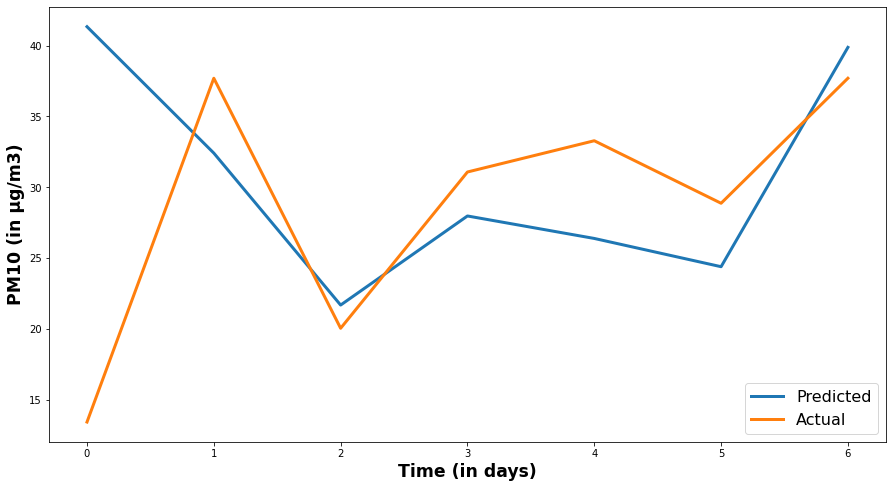

In [ ]:
plt.plot((yhat),label = 'Predicted', linewidth = 3)
plt.plot((y_test), label = 'Actual', linewidth = 3)
plt.xlabel('Time (in days)', fontsize = 'xx-large', fontweight = 'bold')
plt.ylabel('PM10 (in µg/m3)', fontsize = 'xx-large', fontweight = 'bold')
plt.legend(prop = {'size': 16})
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
def mean_absolute_percentage_error(y_true, y_pred): 
   return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


rms_new = sqrt(mean_squared_error(y_test, yhat))
print(rms_new)

mse_new = mean_squared_error(y_test, yhat)
print(mse_new)

mae_new = mean_absolute_error(y_test, yhat)
print(mae_new)

mape_new = mean_absolute_percentage_error(y_test, yhat)
print(mape_new)

11.291785533446223
127.50442053334541
7.360075250857003
40.34294186505533
